---

# Combined features Based Classification

---


In [1]:
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt

## Load dataset

In [2]:
Xa = np.load('../dataset/counts.npy')
Xb = np.load('../dataset/slopes.npy')
Xc = np.load('../dataset/stds.npy')
y = np.load('../dataset/labels.npy')
classes = np.load('../dataset/mappings.npy')

In [3]:
X = np.stack((Xa, Xb, Xc), axis=-1)

In [4]:
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X shape: (36262, 73, 3)
y shape: (36262, 40)


## Train-test split

In [5]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## Model

In [6]:
x_input = keras.layers.Input(shape=(X.shape[1], X.shape[2]))

In [10]:
x = keras.layers.Conv1D(32, 5, activation='relu', padding='same')(x_input)
x = keras.layers.Conv1D(64, 5, activation='relu', padding='same')(x)
x = keras.layers.MaxPooling1D(pool_size=2)(x)
x = keras.layers.Dropout(0.25)(x)

x = keras.layers.Conv1D(32, 5, activation='relu', padding='same')(x_input)
x = keras.layers.Conv1D(64, 5, activation='relu', padding='same')(x)
x = keras.layers.MaxPooling1D(pool_size=2)(x)
x = keras.layers.Dropout(0.25)(x)

x = keras.layers.Conv1D(128, 3, activation='relu', padding='same')(x)
x = keras.layers.Conv1D(128, 3, activation='relu', padding='same')(x)
x = keras.layers.MaxPooling1D(pool_size=2)(x)
x = keras.layers.Dropout(0.25)(x)

In [11]:
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(256, activation='relu')(x)
x = keras.layers.Dropout(0.25)(x)
x = keras.layers.Dense(128, activation='relu')(x)
x = keras.layers.Dropout(0.25)(x)
x = keras.layers.Dense(64, activation='relu')(x)

In [12]:
output = keras.layers.Dense(y.shape[1], activation='softmax')(x)

model = keras.models.Model(inputs=x_input, outputs=output)

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 73, 3)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 73, 32)         │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 73, 64)         │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 36, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 36, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_10 (Conv1D)              │ (None, 36, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_11 (Conv1D)              │ (None, 36, 128)        │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 18, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 18, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 40)             │         2,600 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 718,632 (2.74 MB)

 Trainable params: 718,632 (2.74 MB)

 Non-trainable params: 0 (0.00 B)

## Train

In [14]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50)

Epoch 1/50


I0000 00:00:1744469810.935445   28657 service.cc:146] XLA service 0x7ff614006340 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744469810.935486   28657 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5


 26/794 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0290 - loss: 3.6753

I0000 00:00:1744469816.571277   28657 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


794/794 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.1244 - loss: 3.2529 - val_accuracy: 0.4902 - val_loss: 1.6800
Epoch 2/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4615 - loss: 1.7723 - val_accuracy: 0.5843 - val_loss: 1.3351
Epoch 3/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5480 - loss: 1.4694 - val_accuracy: 0.6227 - val_loss: 1.2161
Epoch 4/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5857 - loss: 1.3228 - val_accuracy: 0.6525 - val_loss: 1.1152
Epoch 5/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6111 - loss: 1.2385 - val_accuracy: 0.6702 - val_loss: 1.0712
Epoch 6/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6333 - loss: 1.1578 - val_accuracy: 0.6926 - val_loss: 0.9887
Epoch 7/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6526 - loss: 1.1001 - val_accuracy: 0.6961 - val_loss: 0.9645
Epoch 8/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6676 - loss: 1.0587 - val_accuracy: 0.7108 - va

In [15]:
# Save the model
model.save('../models/combined_model.keras')

## Test

In [16]:
# Load the arohana-avarohana model
model = keras.models.load_model('../models/combined_model.keras')

In [17]:
loss, accuracy = model.evaluate(X_test, y_test)

170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7894 - loss: 0.6832


In [18]:
print(f'Test accuracy: {round(accuracy * 100, 2)}')

Test accuracy: 79.49


In [19]:
y_pred = model.predict(X_test)

170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [21]:
f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='macro')
print(f'f1 score: {round(f1, 2)}')

f1 score: 0.78


In [22]:
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

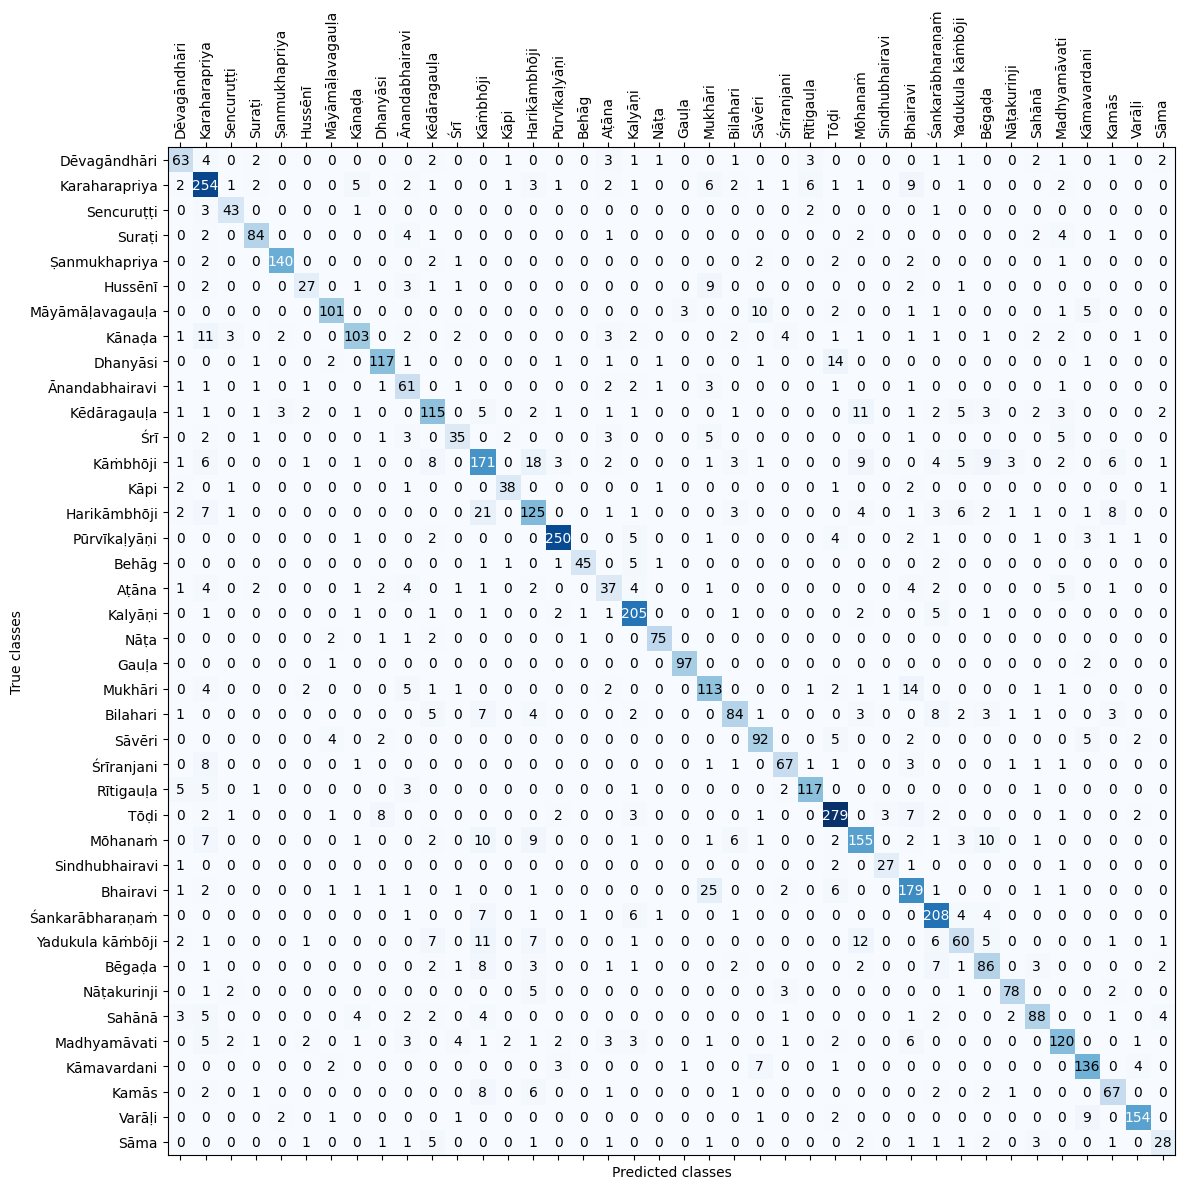

In [23]:
fig, ax = plt.subplots(figsize=(12, 12))
cax = ax.matshow(cm, cmap=plt.cm.Blues)

ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes, rotation=90)
ax.set_yticklabels(classes)

ax.set_xlabel('Predicted classes')
ax.set_ylabel('True classes')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        color = 'black' if cm[i, j] < max(cm.flatten()) / 2 else 'white'
        ax.text(j, i, cm[i, j], ha='center', va='center', color=color)

plt.savefig('../plots/confusion_matrix_combined.png', dpi=300)
plt.tight_layout()
plt.show()

170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
                  precision    recall  f1-score   support

    Dēvagāndhāri       0.72      0.71      0.72        89
   Karaharapriya       0.74      0.83      0.78       305
      Sencuruṭṭi       0.80      0.86      0.83        50
          Suraṭi       0.87      0.83      0.85       101
   Ṣanmukhapriya       0.95      0.92      0.94       152
         Hussēnī       0.73      0.57      0.64        47
 Māyāmāḷavagauḷa       0.88      0.81      0.85       124
          Kānaḍa       0.84      0.71      0.77       145
        Dhanyāsi       0.87      0.84      0.85       140
  Ānandabhairavi       0.62      0.78      0.69        78
     Kēdāragauḷa       0.72      0.70      0.71       164
             Śrī       0.71      0.60      0.65        58
        Kāṁbhōji       0.67      0.67      0.67       255
            Kāpi       0.84      0.81      0.83        47
    Harikāmbhōji       0.66      0.66      0.66       188
    Pūrvīkaḷyāṇi       0.94   

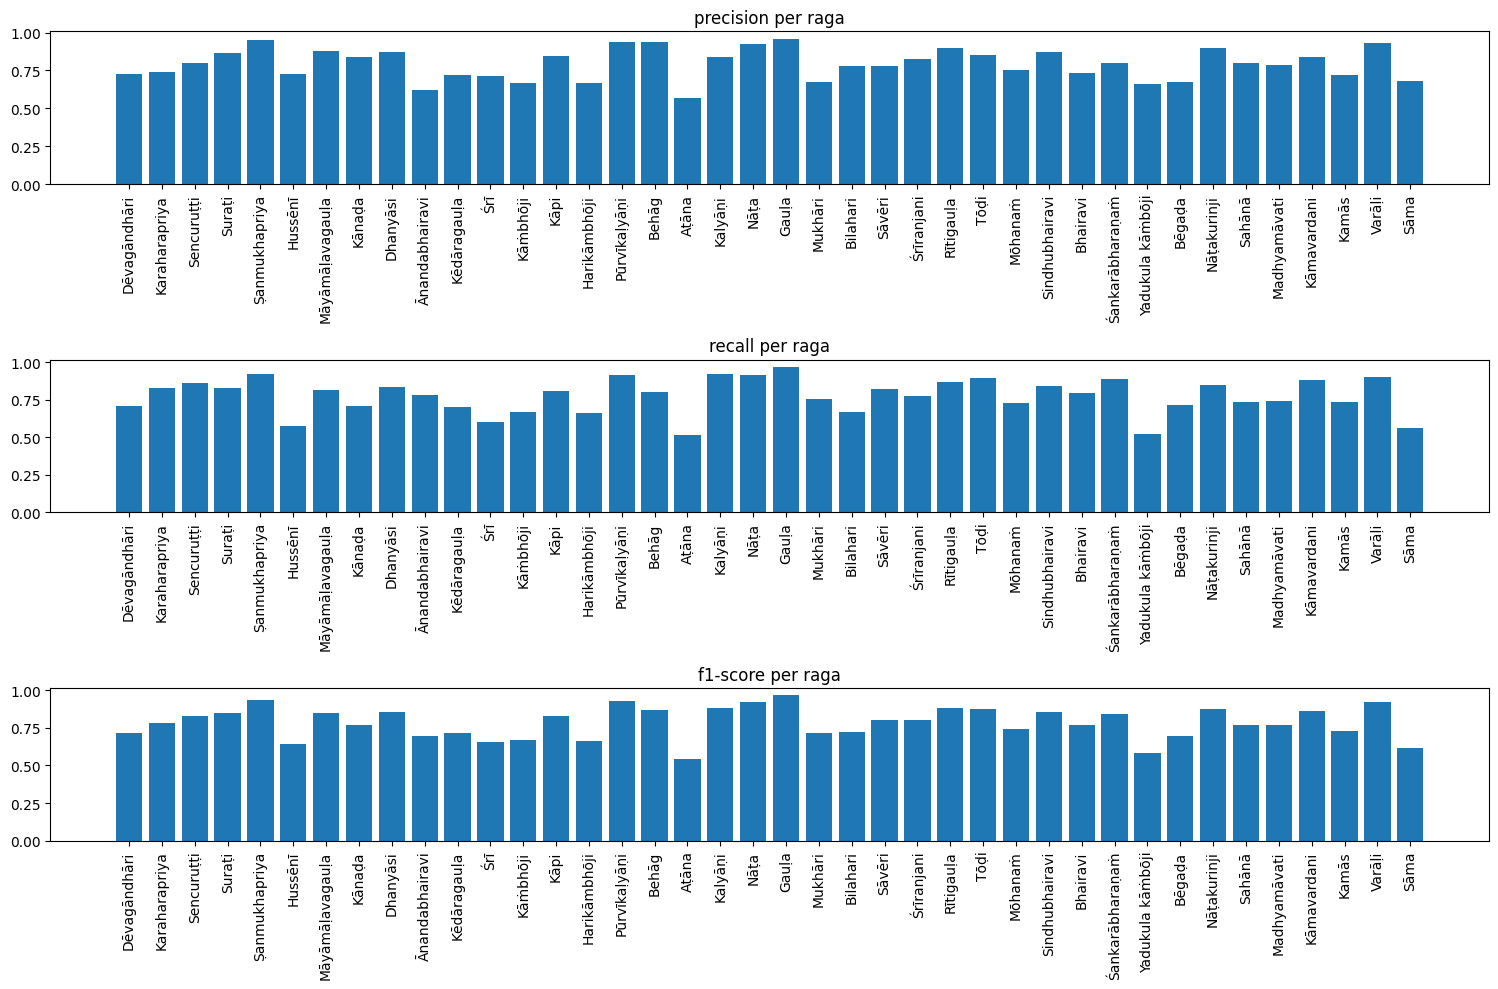

In [24]:
from sklearn.metrics import classification_report

# Get predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate classification report
report = classification_report(y_true_classes, y_pred_classes, target_names=classes, output_dict=True)
print(classification_report(y_true_classes, y_pred_classes, target_names=classes))

# Plot precision, recall and f1-score for each class
metrics = ['precision', 'recall', 'f1-score']
plt.figure(figsize=(15, 10))
for i, metric in enumerate(metrics):
    plt.subplot(3, 1, i+1)
    values = [report[raga][metric] for raga in classes]
    plt.bar(classes, values)
    plt.title(f'{metric} per raga')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('../plots/metrics_per_class.png', dpi=300)
plt.show()